Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


2025-09-23 19:28:05.646848: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9313 - loss: 0.2370 - val_accuracy: 0.9617 - val_loss: 0.1276
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9698 - loss: 0.0984 - val_accuracy: 0.9699 - val_loss: 0.1006
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9783 - loss: 0.0695 - val_accuracy: 0.9728 - val_loss: 0.0892
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9833 - loss: 0.0519 - val_accuracy: 0.9733 - val_loss: 0.0937
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9863 - loss: 0.0421 - val_accuracy: 0.9777 - val_loss: 0.0824
313/313 - 1s - 4ms/step - accuracy: 0.9777 - loss: 0.0824

 Test accuracy: 0.9776999950408936


<function matplotlib.pyplot.show(close=None, block=None)>

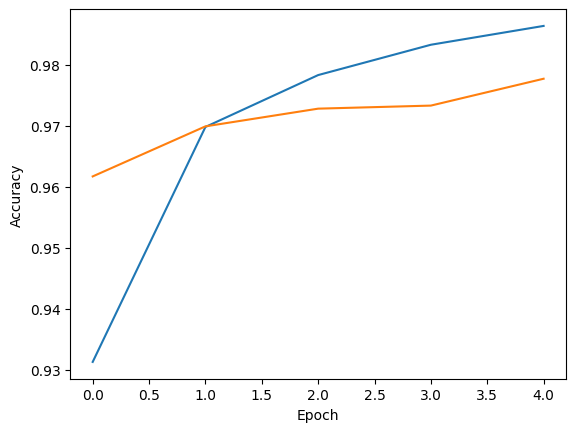

In [7]:
#Using The MNIST dataset to train a simple neural network

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

#Normalizing pixel values (0-255 to 0-1)
x_train, x_test = x_train/255.0, x_test/255.0

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# A simple feed-forward network
model = models.Sequential([layers.Flatten(input_shape=(28, 28)), # Flatten 28 by 28 image to a vector
                           layers.Dense(128, activation='relu'), # Hidden layer 1
                           layers.Dense(64, activation='relu'), # Hidden layer 2
                           layers.Dense(10, activation='softmax') # Output layer - 10 classes
                          ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

#Evaluating the Model 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\n Test accuracy:", test_acc)

#Visualizing the Training
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend
plt.show